## HDFS <sub>(git clone https://github.com/CUKykkim/docker-hadoop.git)</sub>


### 분산 파일 시스템 기본 용어와 개념

**1. 클라이언트 (Client):**
   클라이언트는 사용자가 파일 시스템에 접근하는 인터페이스를 제공합니다.

**2. 네임노드 (NameNode):**
   네임노드는 메타데이터를 관리하고 파일과 블록 간의 매핑을 저장합니다.

**3. 데이터노드 (DataNode):**
   데이터노드는 실제 데이터 블록을 저장하고 관리합니다.

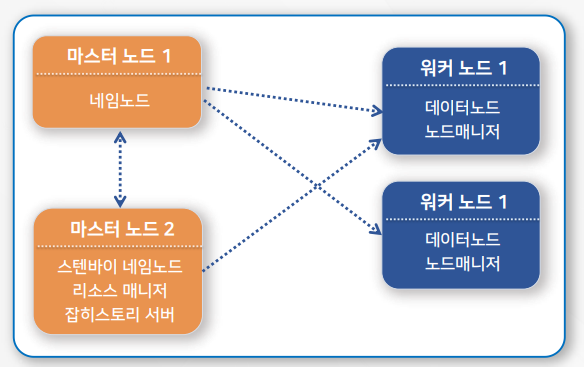
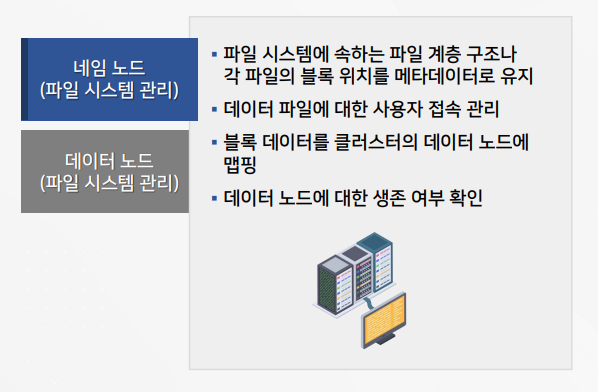
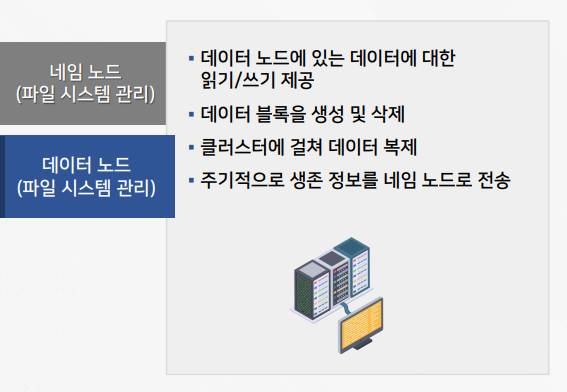

### 분산 파일 시스템 아키텍처 작동 원리

**1. 파일 저장 (File Storage):**
   파일은 여러 데이터 블록으로 나누어지고 각 블록은 여러 데이터노드에 저장됩니다.

**2. 네임노드 정보 (NameNode Information):**
   네임노드는 파일과 블록 간의 매핑 정보를 유지하고 클라이언트에게 제공합니다.

**3. 데이터 읽기/쓰기 (Read/Write Data):**
   클라이언트는 네임노드에서 메타데이터를 얻고 데이터노드에서 데이터를 읽거나 쓸 수 있습니다.

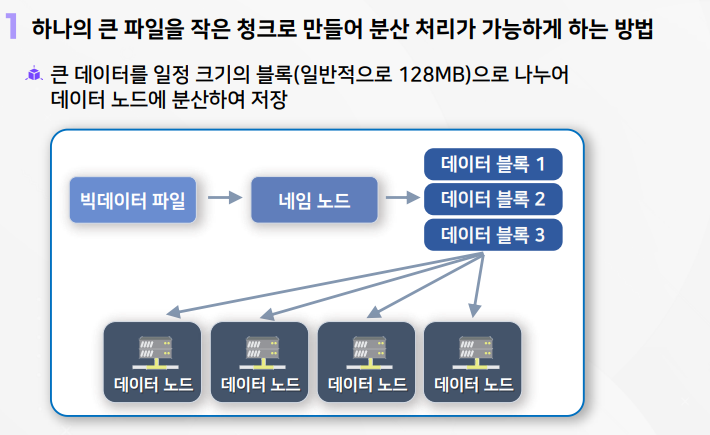
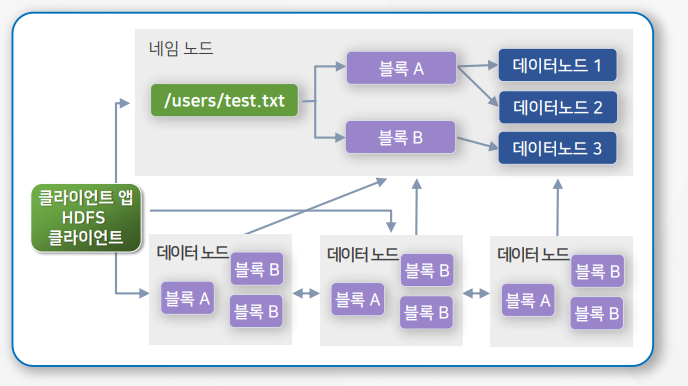

## 하둡과 YARN (Yet Another Resource Negotiator)

### 하둡(Hadoop)

**1. 개요:**
   하둡은 대량의 데이터를 분산 처리하는 데 사용되는 오픈 소스 프레임워크입니다.

**2. 주요 구성 요소:**
   - HDFS (Hadoop Distributed File System): 대용량 데이터를 분산하여 저장하는 파일 시스템.
   - MapReduce: 데이터를 분산 처리하고 분석하는 프레임워크.

**3. 동작 원리:**
   - 데이터를 블록 단위로 나누어 여러 노드에 분산 저장 (HDFS).
   - MapReduce 작업을 여러 노드에 분산하여 병렬 처리.

### YARN (Yet Another Resource Negotiator)

**1. 개요:**
   YARN은 하둡 클러스터의 자원 관리 및 작업 스케줄링을 담당하는 컴포넌트.

**2. 주요 구성 요소:**
   - ResourceManager: 클러스터의 자원을 관리하고 작업 스케줄링을 담당.
   - NodeManager: 개별 노드에서 실행되며 자원 할당 및 작업 관리.

**3. 동작 원리:**
   - ResourceManager가 클러스터의 자원 상태를 파악하고 요청에 따라 자원을 할당.
   - NodeManager가 각 노드의 자원 사용 상황을 관리하고 ResourceManager에 보고.

### 하둡과 YARN 동작 구조

[하둡과 YARN 동작 구조]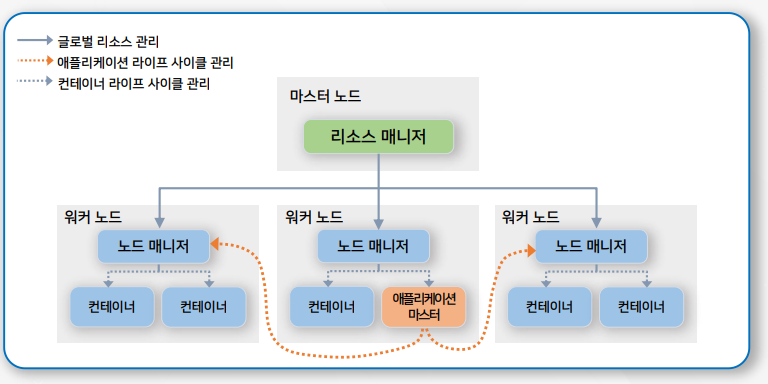

- 클라이언트가 ResourceManager에 작업을 요청하면 ResourceManager가 각 NodeManager에 자원을 할당하여 작업을 수행하게 됩니다.

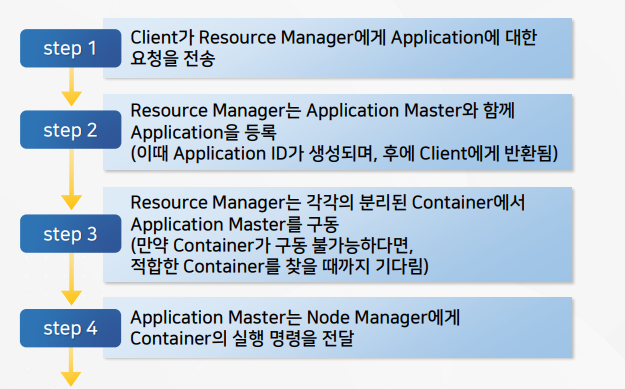
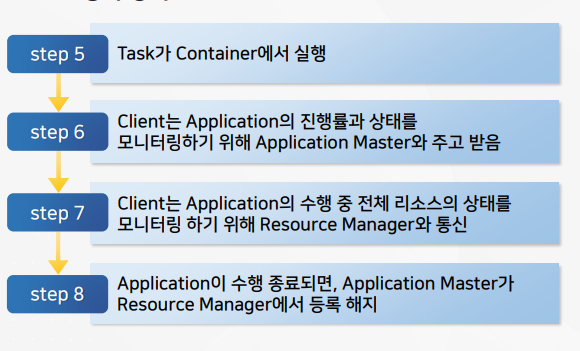

## MapReduce
<div align="center">

## Distributed processing programming model

</div>

## MapReduce: Simplifying Big Data Processing

MapReduce is a programming model and processing framework designed to process large volumes of data in a parallel and distributed manner.


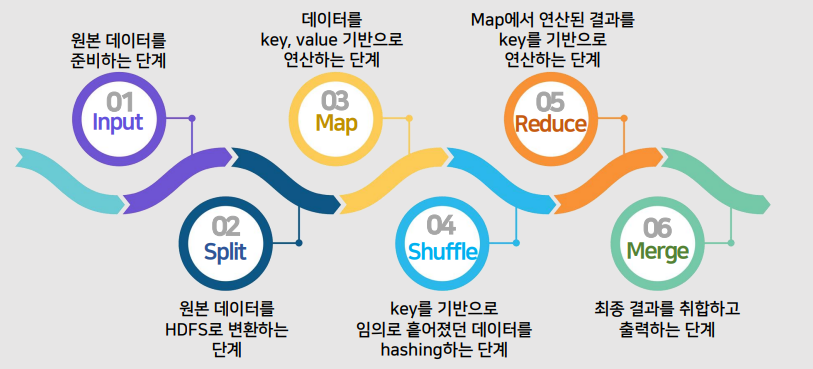


### Key Terms:

- **Mapper**: A function that processes input data and generates key-value pairs.

- **Reducer**: A function that aggregates and processes the intermediate key-value pairs generated by mappers.

- **Map Task**: The execution of the mapper function on a subset of the input data.

- **Reduce Task**: The execution of the reducer function on the output of map tasks.

### How MapReduce Works:

1. **Splitting**: Input data is divided into smaller chunks for parallel processing.

2. **Mapping**: _Mappers process these chunks independently and generate intermediate key-value pairs._

3. **Shuffling and Sorting**: _The framework groups and sorts the intermediate key-value pairs based on keys._

4. **Reducing**: _Reducers process the sorted key-value pairs and produce the final output._

MapReduce simplifies the processing of massive data sets by distributing the computation across a cluster of machines and handling failures and job monitoring automatically.


## mapper.py<sub>/hadoop-data/HadoopWithPython/python/MapReduce/HadoopStreaming</sub>

In [9]:
#!/root/anaconda3/bin/python
import sys

for line in sys.stdin:
  line=line.strip()
  keys=line.split()
  for key in keys:
    value=1
    print("{0}\t{1}".format(key,value))

## reducer.py<sub>/hadoop-data/HadoopWithPython/python/MapReduce/HadoopStreaming</sub>

In [11]:
#!/root/anaconda3/bin/python
import sys
last_key=None
running_total=0

for input_line in sys.stdin:
  input_line=input_line.strip()
  this_key,value=input_line.split("\t",1)
  value=int(value)
    #기존에 존재하는 단어이면 카운트 증가 처리
  if last_key == this_key:
    running_total += value
  else: #새로운 단어이면
    if last_key:
      print("{0}\t{1}".format(last_key,running_total))
    running_total=value
    last_key=this_key

if last_key==this_key:
  print("{0}\t{1}".format(last_key, running_total))

NameError: name 'this_key' is not defined